<a href="https://colab.research.google.com/github/karegapauline/Health-Environment-Data-Linking/blob/main/airqual_health_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project tries to integrate health and environmental data in Nairobi. The data it makes use of is location of health sites in Nairobi county from healthsites.io and information about air quality sensors in the county. Eventually, we will add information about industries in the locales identified, and the demography of each area obtained from census data.

It is important to understand the impact of air quality on health. Knowledge of hotspots and sudden outbreaks can inform hospitals on the type of resources to stock up on. Our theoretical approach for this project is that, when we know the sites of monitors, and the hospitals around the regions (if the monoitor is not located in the hospital), hospitals can use this information to observe patterns in cases concerning air quality. They can note the number of cases of asthma, and other respiratory diseases. they can inform the public anbout the rise or decrease in cases as well. Once information about industries, projects, or road traffic and such are added, they can be able to note or linbk cause and effect better. This information can then be passed on to necessary authorities.



In [ ]:
##install necessary libraries
install.packages("sf")
library(sf)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.3.1; sf_use_s2() is TRUE



In [ ]:
my_sf <- read_sf("/content/County.shp")

##plot the counties
#par(mar = c(0, 0, 0, 0))
#plot(st_geometry(my_sf), col = "#f2f2f2", bg = "skyblue", lwd = 0.25, border = 0)

##draw the boundaries
# Plot it
library(ggplot2)
ggplot(my_sf) +
  geom_sf(fill = "#69b3a2", color = "white") +
  theme_void()

ERROR: Error in read_sf("/content/County.shp"): could not find function "read_sf"


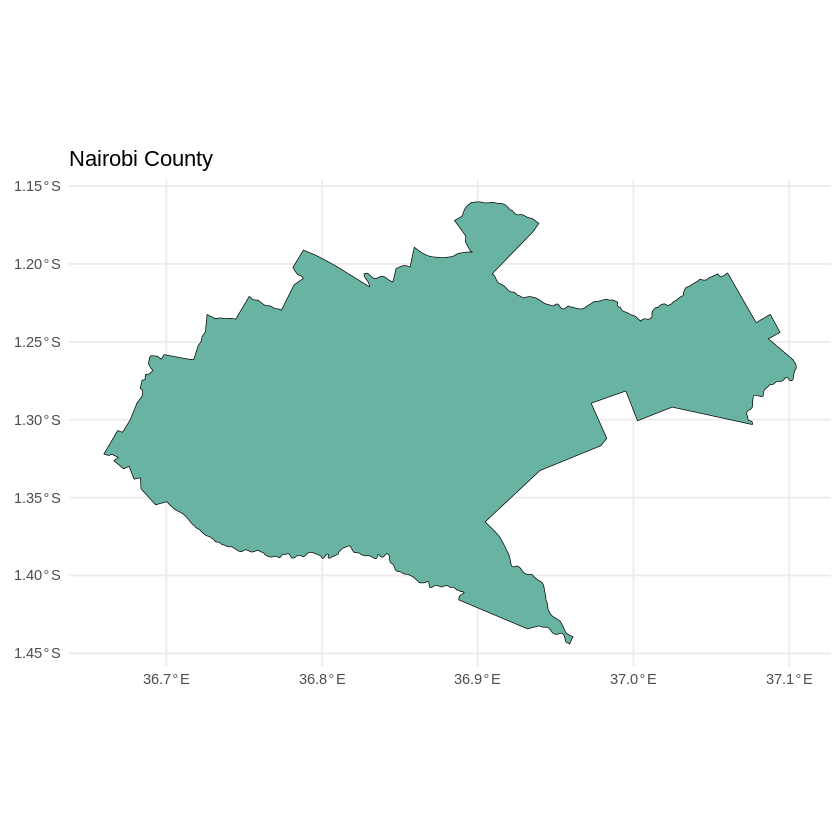

In [ ]:
#names(my_sf)

nairobi <- my_sf[my_sf$COUNTY %in% c("Nairobi"), ]

# Plot Nairobi County
ggplot(data = nairobi) +
  geom_sf(fill = "#69b3a2", color = "black") +
  ggtitle("Nairobi County") +
  theme_minimal()

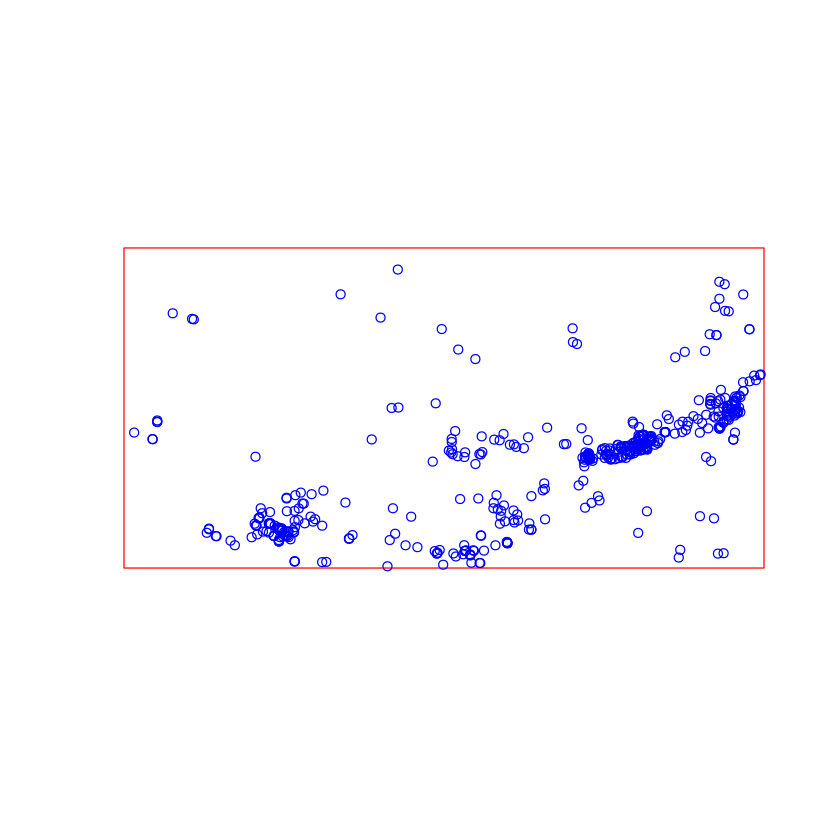

In [ ]:
my_hosps <- read_sf("/content/Kenya-node.shp")
#head(my_hosps, n=20)

#nairobi_hosps <- my_hosps[my_hosps$geometry %in% c("POINT(36.49 -1.17)"), ]
# Step 2: Make sure the shapefile is in WGS84 (lat/lon)
hospitals <- st_transform(my_hosps, crs = 4326)

# Step 3: Define a bounding box for Nairobi
nairobi_bbox <- st_as_sfc(st_bbox(c(xmin = 36.70, xmax = 36.90,
                                    ymin = -1.30, ymax = -1.20),
                                  crs = st_crs(4326)))

# Step 4: Filter hospital points within Nairobi
nairobi_hospitals <- hospitals[st_within(hospitals, nairobi_bbox, sparse = FALSE),]

# Step 5: Plot
plot(st_geometry(nairobi_bbox), border = "red")
plot(st_geometry(nairobi_hospitals), col = "blue", add = TRUE)

In [ ]:
ggplot(states, aes(long, lat, group=1)) +
  geom_polygon(fill = "white", colour = "black")